# Erros numéricos e seus efeitos

## Motivação

**Exemplo**: Avaliar o polinômio $P(x) = x^3 - 6x^2 + 4x - 0.1$
no ponto $x=5.24$ e comparar com o resultado exato.

Vamos fazer o seguinte:

1. Com uma calculadora, computar o valor de $P(5.24)$ e assuma que este é seu valor exato.

2. Calcular $P(5.24)$ usando arredondamento com dois dígitos de precisão.

**Passo 1**

Faça as suas contas! Suponhamos que seja -0.007776.

**Passo 2**

Vamos "imitar" as contas feitas na mão... 

In [2]:
# parcelas 

p1 = 5.24**3
print('p1: {0:.20g}'.format(p1)) # 20 dígitos significativos
print('p1 (com arredondamento): {0:.2f}'.format(p1)) 

print('\n')

p2 = - 6*5.24**2
print('p2: {0:.20g}'.format(p2))
print('p2 (com arredondamento): {0:.2f}'.format(p2))

print('\n')

p3 = 4*5.24
print('p3: {0:.20g}'.format(p3))
print('p3 (com arredondamento): {0:.2f}'.format(p3))

print('\n')

p4 = - 0.1
print('p4: {0:.20g}'.format(p4))
print('p4 (com arredondamento): {0:.2f}'.format(p4))

print('\n')

Px = p1 + p2 + p3 + p4
print('Px: {0:.20g}'.format(Px))
print('Px: (com arredondamento): {0:.2f}'.format(Px))

p1: 143.87782400000000393
p1 (com arredondamento): 143.88


p2: -164.74560000000002447
p2 (com arredondamento): -164.75


p3: 20.960000000000000853
p3 (com arredondamento): 20.96


p4: -0.10000000000000000555
p4 (com arredondamento): -0.10


Px: -0.0077760000000196838332
Px: (com arredondamento): -0.01


**Conclusão:** o cálculo com dois dígitos afeta o resultado drasticamente!

Agora, vamos comparar o resultado de se avaliar $P(5.24)$ com as duas formas do polinômio e 16 dígitos de precisão:

In [4]:
# ponto de análise
x = 5.24

# P1(x) 
P1x = x**3 - 6*x**2 + 4*x - 0.1 
print('{0:.16f}'.format(P1x))

# P2(x) 
P2x = x*(x*(x - 6) + 4) - 0.1 # forma estruturada (forma de Hörner)
print('{0:.16f}'.format(P2x))


-0.0077760000000197
-0.0077759999999939


O que temos acima? Dois valores levemente distintos. Se computarmos os erros absoluto e relativo entre esses valores e nosso valor supostamente assumido como exato, teríamos: 

**Erros absolutos**

In [4]:
x_exato = -0.007776
EA1 = abs(P1x - x_exato)
print(EA1)

EA2 = abs(P2x - x_exato)
print(EA2)

1.968390728190883e-14
6.1287780406260595e-15


Claro que $EA_1 > EA_2$. Entretanto, podemos verificar pelo seguinte teste lógico:

In [5]:
# teste é verdadeiro
EA1 > EA2

True

**Erros relativos**

Os erros relativos também podem ser computados como:

In [6]:
ER1 = EA1/abs(x_exato)
print(ER1)

ER2 = EA2/abs(x_exato)
print(ER2)

2.5313666772002096e-12
7.881659002862731e-13


**Gráfico de $P(x)$**

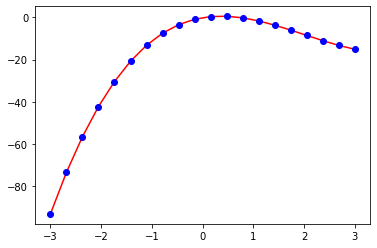

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# eixo x com 20 pontos
x = np.linspace(-3,3,num=20,endpoint=True)

# plotagem de P1(x) e P2(x)
P1x = lambda x: x**3 - 6*x**2 + 4*x - 0.1
P2x = lambda x: x*(x*(x - 6) + 4) - 0.1
plt.plot(x,P1x(x),'r',x,P2x(x),'bo');

## Erro de cancelamento

Ocorre quando números de grandezas próximas são subtraídos. No exemplo, a seguir, induzimos uma divisão por zero usando o valor do épsilon de máquina $\epsilon_m$ ao fazer 

$$\dfrac{1}{(1 + 0.25\epsilon_m) - 1}$$

Isto ocorre porque o denominador sofre um _cancelamento subtrativo_, quando, para a matemática precisa, deveria valer $0.25\epsilon_m$.

## Propagação de erros

Vamos comparar duas situações. Calcular 

$$e^{-v} = \sum_{i=0}^{\infty} (-1)^i \frac{v^i}{i!}$$

e comparar com a identidade $$e^{-v} = \dfrac{1}{e^v}.$$

In [11]:
# somatória (primeiros 20 termos)
v = 5.25
s = 0
for i in range(20):    
    print('{0:5g}'.format(s))    
    s += ((-1)**i*v**i)/np.math.factorial(i)

print('\ncaso 1: {0:5g}'.format(s))    

print('caso 2: {0:5g}'.format(1/np.exp(v)))

    0
    1
-4.25
9.53125
-14.5859
17.0679
-16.1686
12.9133
-8.89814
5.41562
-2.93407
1.44952
-0.642652
0.272671
-0.0969786
0.0416401
-0.00687642
0.00904307
0.00412676
0.00556069

caso 1: 0.00516447
caso 2: 0.00524752
